# **A data driven analysis of the Refugee Crisis**

# Introduction (Heb voor nu maar wat ingevuld)

The refugee crisis has been an ongoing topic for decades, causing divides amongst many people across all corners of the world. The refugee crisis entails the forced displacement of large groups of people. It is a complex humanitarian challenge, often caused by both historical as well as current geopolitical conflicts and divisions.

The refugee crisis has many different perspectives, when it comes to the causes, as well as the effects, and the correct way of tackling it.

A common disagreement in this topic regards asylum procedure. One perspective is that the asylum procedure is good, or good in some countries. Arguments made for this are for example that some countries house a much larger portion of refugees than others. Of course, there are many more nuanced stances and statistics.

The (generally) opposing stance is that asylum systems like much adjustment to help the problem, or that they even worsen the problem. For many countries the seeking of an asylum, or rather the process of being assigned to one can take absurdly long and/or convoluted. This can result in the accumulation of the queue for refugees, thus worsening the crisis.

# Dataset and preprocessing

**Dataset**

For this data story we use mostly refugee data from the UN High Commissioner for Refugees (UNHCR). This is data on uprooted populations and asylum processing. It can be downloaded here: https://www.kaggle.com/datasets/unitednations/refugee-data.

 The dataset consists of 6 csv's with varying data, regarding many demographics around the refugee crisis for many different countries, such as the movement of displaced persons, the amount per month, progress through the refugee system, the location of origin and destination, etc. Besides this data, there is also data regarding the outcomes and responses of asylum petitions for different countries.

We also use some open data from the Centraal Bureau voor de Statistiek (cbs), regarding asylum applications and family reunification; nationality, sex and age, in the Netherlands. It can be downloaded here: https://opendata.cbs.nl/statline/#/CBS/nl/dataset83102ned/table.

This table contains data on the numbers of submitted asylum applications and following family members (following family members) per month, quarter and year, distinguished by the nationality, gender and age group of the asylum seeker and following family member. In addition to the total number of requests, the first and subsequent requests are also included. As of 2016, the first requests include relocation. Figures are available from January 2013. The figures shown concern asylum seekers who have been formally identified and registered.


**Preprocessing**

- Using the asylum_seekers_monthly.csv file, constructed a csv where the columns consist of countries of asylum and their montly asylum seekers.
  - In the original csv, there were tons of rows for each country of asylum and all the corresponding countries of origin per month.
  - To achieve the new csv we grouped the data and summed on the country of origin (losing the info of the origin of the refugees, in order to focus on the total amount of incoming asylum seekers per country).
- Using the asylum_seekers.csv file, constructed a csv where the variables consist of multiple columns per country of asylum. For every country there is a column for the new asylum applications per year, The total pending applications at the start of the year, and the total pending applications at the end of the year.
  - To achieve this we again summed over the countries of origin (only per year now, because this data is yearly, not montly).
  - This summing was also done grouped by the different categories mentioned earlier, thus resulting in three columns per country.
  - Also most of the columns were removed due to their irrelevance.
- For many plots some countries/columns were removed to focus on a specific country or continent.
- Also some country seems were shortened or simplified for plot aesthetic.

In [7]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import io
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import numpy as np


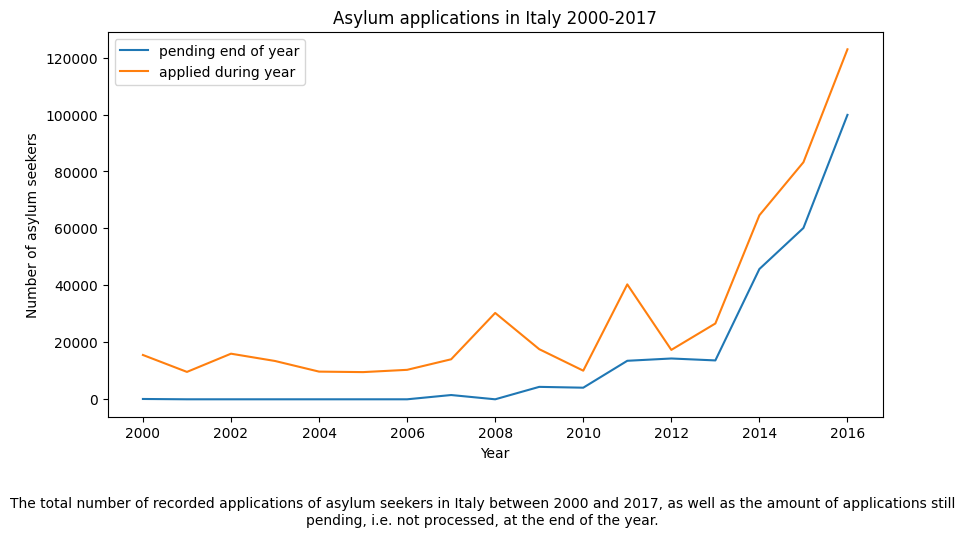

In [8]:
# Read the CSV file
apypc_df = pd.read_csv("data/applied_pending_yearly_per_country.csv", low_memory=False)

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the data
ax.plot(apypc_df["('pending end-year\', \'Italy\')"], label="pending end of year")
ax.plot(apypc_df["('Applied during year\', \'Italy\')"], label="applied during year")

# Set labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Number of asylum seekers")
ax.set_title("Asylum applications in Italy 2000-2017")

# Set x-axis ticks and labels
ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16])
ax.set_xticklabels(range(2000, 2017, 2))

# Add legend
ax.legend()

# Set figure size
fig.set_size_inches(10, 5)

# Add text below the plot
txt = "The total number of recorded applications of asylum seekers in Italy between 2000 and 2017, as well as the amount of applications still pending, i.e. not processed, at the end of the year."
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=10)

# Display the plot
plt.show()

C:\Users\thoma\AppData\Local\Temp\ipykernel_10520\4196586825.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



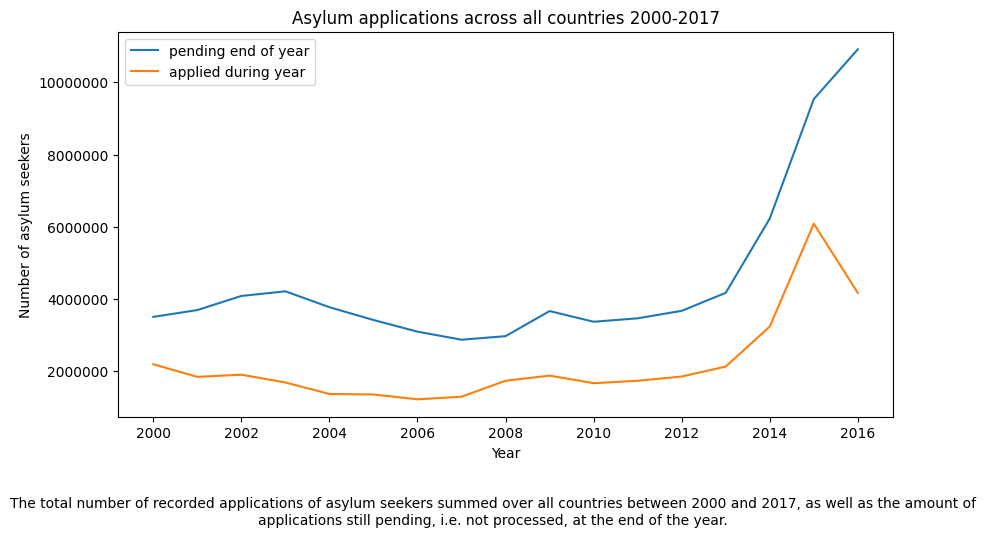

In [9]:
fig, ax = plt.subplots()
ax.plot(apypc_df.filter(regex='end').sum(axis=1), label="pending end of year")
ax.plot(apypc_df.filter(regex='Applied').sum(axis=1), label="applied during year")
ax.set_xlabel("Year")
ax.set_title("Asylum applications across all countries 2000-2017")
ax.set_ylabel("Number of asylum seekers")
ax.set_xticks([0,2,4,6,8,10,12,14,16])
ax.set_xticklabels([i for i in range(2000, 2017, 2)])
ax.set_yticklabels([i for i in range(0, 10000001, 2000000)])
ax.legend()
fig.set_size_inches(10, 5)
txt="The total number of recorded applications of asylum seekers summed over all countries between 2000 and 2017, as well as the amount of applications still pending, i.e. not processed, at the end of the year."
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

In [10]:
# Read the CSV file
pmpc_df = pd.read_csv("data/processed_monthly_per_country.csv", sep=",", low_memory=False)

# Rename the column for the United Kingdom
pmpc_df = pmpc_df.rename(columns={"United Kingdom of Great Britain and Northern Ireland": "United Kingdom"})

# Remove unwanted columns
columns_to_drop = ['Canada', 'Liechtenstein', 'Rep. of Korea', 'New Zealand', 'USA (EOIR)', 'USA (INS/DHS)',
                   'Japan', 'Canada', 'Liechtenstein', 'Rep. of Korea', 'New Zealand', 'USA (EOIR)', 'USA (INS/DHS)',
                   'The former Yugoslav Rep. of Macedonia', 'Serbia and Kosovo: S/RES/1244 (1999)', 'Albania',
                   'Lithuania', 'Montenegro', 'Bosnia and Herzegovina', 'Estonia', 'Slovakia', 'Japan', "Cyprus",
                   "Latvia", "Malta", "Croatia", "Slovenia", "Romania", "Ireland", "Australia"]
pmpc_df = pmpc_df.drop(columns_to_drop, axis=1)

# Create trace for each year
trace = [
    go.Bar(
        name='2015',
        x=pmpc_df.columns[2:],
        y=pmpc_df[pmpc_df.Year == 2015].iloc[:, 2:].sum(),
        marker_color='rgb(102,194,165)'
    ),
    go.Bar(
        name='2016',
        x=pmpc_df.columns[2:],
        y=pmpc_df[pmpc_df.Year == 2016].iloc[:, 2:].sum(),
        marker_color='rgb(252,141,98)'
    ),
    go.Bar(
        name='2017',
        x=pmpc_df.columns[2:],
        y=pmpc_df[pmpc_df.Year == 2017].iloc[:, 2:].sum(),
        marker_color='rgb(141,160,203)'
    )
]

# Set layout for the plot
layout = go.Layout(
    xaxis=go.layout.XAxis(
        type='category'
    )
)

# Create the figure
fig = go.Figure(data=trace, layout=layout)

# Update layout and display the plot
fig.update_layout(
    title='<b>Asylum seekers in Europe 2015-2017</b>',
    yaxis=dict(
        title='Number of new asylum seekers'
    ),
    xaxis=dict(
        title='Country<br><sup>The total number of new asylum seekers in European countries between 2015 and 2017.</sup>',
        titlefont_size=20
    ),
    height=500
)

# Show the plot
fig.show()

In [11]:
# Read the CSV file into a DataFrame
anngl_df = pd.read_csv("data/Asielverzoeken_en_nareizigers__nationaliteit__geslacht_en_leeftijd_18062023_133350.csv", low_memory=False, sep=';')

# Define color palette for the pie chart
colors = ['#4C78A8', '#F58518', '#EECA3B', '#54A24B', '#E45756', '#72B7B2']

# Create the pie chart using Plotly Express
fig = px.pie(
    anngl_df[anngl_df["Onderwerp"] == "Eerste asielverzoeken (personen)"][1:],
    values='2023 april*',
    names='Nationaliteit',
    color_discrete_sequence=colors,
    hole=0.6,
    height=600,
    title="<b>The Netherlands, initial asylum seekers Origins 2023 april</b>",
    labels={'x': "Fruits<br><sup>Fruit sales in the month of January</sup>"}
)

# Update chart layout
fig.update(layout_showlegend=False)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    height=600,
    annotations=[
        dict(
            text='The ratio of the origins of initial asylum seekers arriving in the Netherlands during April 2023.',
            x=0.5,
            y=-0.1,
            font_size=15,
            showarrow=False
        ),
        dict(
            text='These are people who travel first and are not following family, for example.',
            x=0.5,
            y=-0.15,
            font_size=15,
            showarrow=False
        )
    ]
)

In [12]:
# Define the colors for the pie chart
colors = ['#4C78A8', '#F58518', '#EECA3B', '#54A24B', '#E45756', '#72B7B2']

# Filter the dataframe and create a pie chart
fig = px.pie(
    anngl_df[anngl_df["Onderwerp"] == "Nareizigers (personen)"][1:],
    values='2023 april*',
    names='Nationaliteit',
    color_discrete_sequence=colors,
    hole=0.8,
    height=600,
    title="<b>The Netherlands, follow up travelers Origins 2023 april</b>"
)

# Hide the legend
fig.update(layout_showlegend=False)

# Set the text position and information to show in the chart
fig.update_traces(textposition='inside', textinfo='percent+label')

# Set the height and add annotations to the chart
fig.update_layout(
    height=600,
    annotations=[
        dict(
            text='The ratio of the origins of follow up asylum seekers arriving in the Netherlands during April 2023.',
            x=0.5, y=-0.1, font_size=15, showarrow=False
        ),
        dict(
            text='These are people who do not travel first, and are often following family.',
            x=0.5, y=-0.15, font_size=15, showarrow=False
        )
    ]
)

In [13]:
pmpc_df = pd.read_csv("data/processed_monthly_per_country.csv", sep=",", low_memory=False)

trace = go.Bar(
    x = pmpc_df['Year'].unique(),
    y = pmpc_df.groupby(pmpc_df.Year)['Netherlands'].sum()
)
fig = go.Figure(trace)

fig.update_layout(
    title='<b>Yearly asylum seekers in the Netherlands</b>',
    yaxis=dict(
        title='Number of new asylum seekers',
    ),
    xaxis=dict(
        title='Year<br><sup>The total number of new asylum seekers arriving in the Netherlands between 1999 and 2017.</sup>',
        titlefont_size=20,
    ),
    height=400,
)
fig.show()

In [14]:
# Read the CSV file into a DataFrame
pmpc_df = pd.read_csv('data/processed_monthly_per_country.csv', low_memory=False)

# Group the data by year and calculate the sum of refugees for the Netherlands
df_grouped = pmpc_df.groupby('Year')['Netherlands'].sum().reset_index()

# Create a bar chart using Plotly Express
fig = px.bar(df_grouped, x='Year', y='Netherlands',
             labels={'Year': 'Year', 'Netherlands': 'Quantity'},
             title='Annual influx of refugees to the Netherlands')

# Rotate the x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Display the figure
fig.show()

In [15]:
ts_df = pd.read_csv('data/time_series.csv')
jaren = ts_df['Year'].value_counts().sort_index()

fig = px.bar(x=jaren.index, y=jaren.values)
fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Quantity'),
    title='Global refugee count',
    xaxis_tickangle=-90
)

fig.show()

C:\Users\thoma\AppData\Local\Temp\ipykernel_10520\1928972097.py:1: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



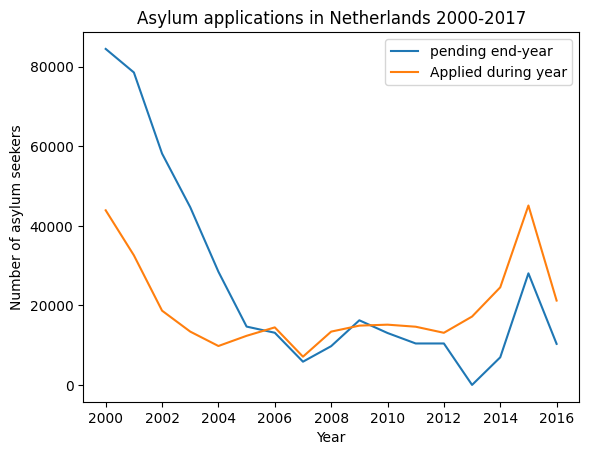

In [16]:
# Plotting data
fig, ax = plt.subplots()
ax.plot(apypc_df["('pending end-year', 'Netherlands')"], label="pending end-year")
ax.plot(apypc_df["('Applied during year', 'Netherlands')"], label="Applied during year")

# Setting labels and title
ax.set_xlabel("Year")
ax.set_title("Asylum applications in Netherlands 2000-2017")
ax.set_ylabel("Number of asylum seekers")

# Setting x-axis ticks and labels
ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16])
ax.set_xticklabels([i for i in range(2000, 2017, 2)])

# Adding legend and displaying plot
ax.legend()
plt.show()